# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 4</font>
***

# <font color=green>1 CONHECENDO OS DADOS</font>
***

## <font color=green>1.1 Dataset do projeto</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados|
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

### Solução do problema com dependência do statsmodels

In [105]:
# Retire o comentário da linha de código abaixo caso precise fazer a correção

# !pip install scipy==1.2 --upgrade

### Importando bibliotecas

https://pandas.pydata.org/

https://www.numpy.org/

https://seaborn.pydata.org/

In [106]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
import statsmodels.stats as ss
import scipy.stats as st

### Lendo o dataset do projeto

In [107]:
dados = pd.read_csv('dados.csv')
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


In [108]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76840 entries, 0 to 76839
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UF              76840 non-null  int64  
 1   Sexo            76840 non-null  int64  
 2   Idade           76840 non-null  int64  
 3   Cor             76840 non-null  int64  
 4   Anos de Estudo  76840 non-null  int64  
 5   Renda           76840 non-null  int64  
 6   Altura          76840 non-null  float64
dtypes: float64(1), int64(6)
memory usage: 4.1 MB


---

# <font color=green>2 RODANDO UMA REGRESSÃO LINEAR</font>
***

## Dataset de exemplo
> ### $Y$ = Gasto das famílias
> ### $X$ = Renda das Famílias

In [109]:
dataset = {
    'Y': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'X': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [110]:
dataset = pd.DataFrame(dataset)

In [111]:
dataset.rename(columns={'Y': 'gasto', 'X': 'renda'}, inplace=True)
dataset.head()

,gasto,renda
0,3011,9714
1,1305,3728
2,1879,6062
3,2654,8845
4,2849,8378


In [112]:
dataset.shape

(50, 2)

### Estatísticas descritivas

In [113]:
dataset.describe()

,gasto,renda
count,50.000000,50.000000
mean,2011.120000,6065.500000
std,817.214648,2707.187812
min,353.000000,1069.000000
25%,1362.250000,3516.500000
50%,2127.000000,6363.000000
75%,2675.750000,8381.750000
max,3302.000000,9997.000000


In [114]:
st.normaltest(dataset.renda)

NormaltestResult(statistic=np.float64(10.24700482605479), pvalue=np.float64(0.0059551290054405655))

In [115]:
st.shapiro(dataset.renda)

ShapiroResult(statistic=np.float64(0.939862987598878), pvalue=np.float64(0.013305586400399973))

In [116]:
from statsmodels.stats.weightstats import zconfint

In [117]:
zconfint(dataset.renda)

(np.float64(5315.119611751388), np.float64(6815.880388248612))

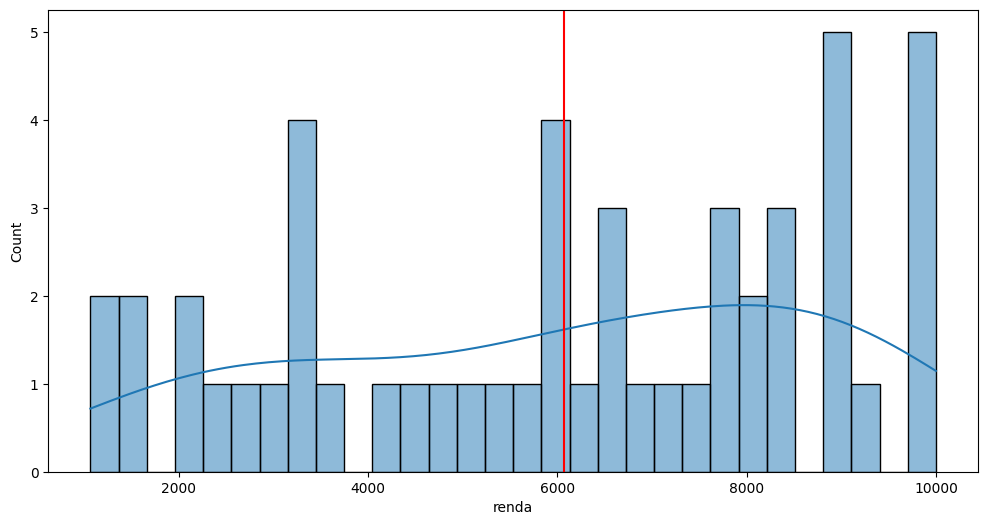

In [118]:
ax = sns.histplot(dataset.renda, bins = 30, kde = True)
ax.figure.set_size_inches(12,6)
ax.axvline(dataset.renda.mean(), color='red')

### Análise gráfica

https://seaborn.pydata.org/generated/seaborn.boxplot.html

<function matplotlib.pyplot.show(close=None, block=None)>

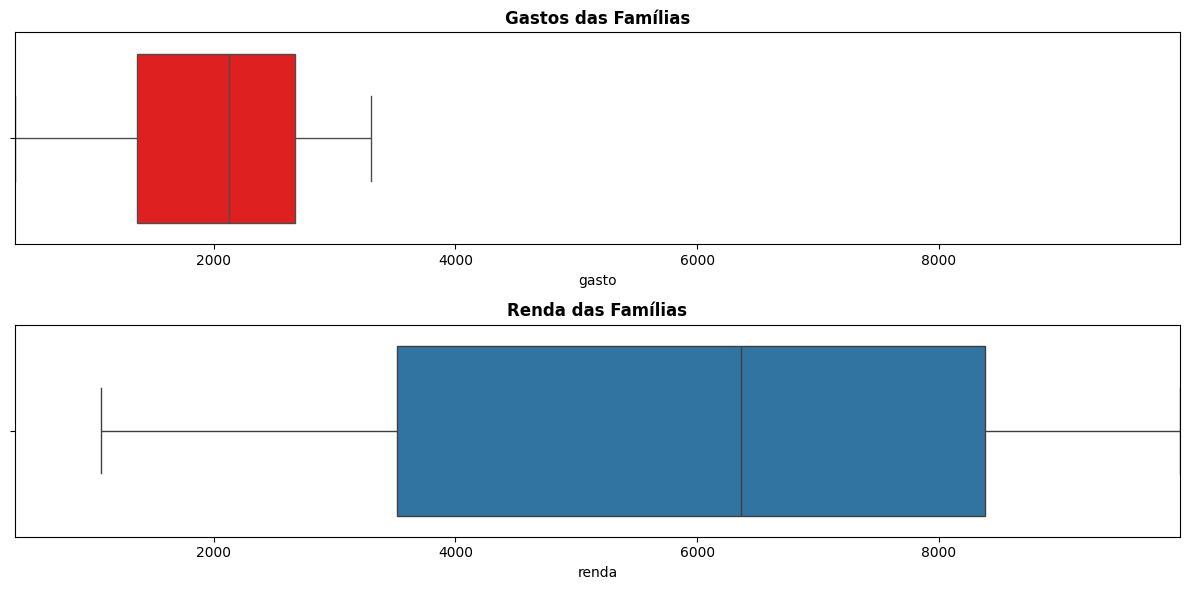

In [119]:
fig, (ax1,ax2) = plt.subplots(2,1, figsize = (14,7))

lim_min = dataset.gasto.min()
lim_max = dataset.renda.max()

ax1.set_xlim(lim_min, lim_max)
sns.boxplot(x = 'gasto', data = dataset, ax = ax1, color = 'red')
ax.set_xlim(lim_min, lim_max)
ax1.figure.set_size_inches(12,6)
ax1.set_title('Gastos das Famílias', fontweight = 'bold')

sns.boxplot(x = 'renda', data = dataset, ax = ax2)
ax2.set_xlim(lim_min, lim_max)
ax2.figure.set_size_inches(12,6)
ax2.set_title('Renda das Famílias', fontweight = 'bold')

plt.tight_layout()
plt.show


https://seaborn.pydata.org/generated/seaborn.lmplot.html

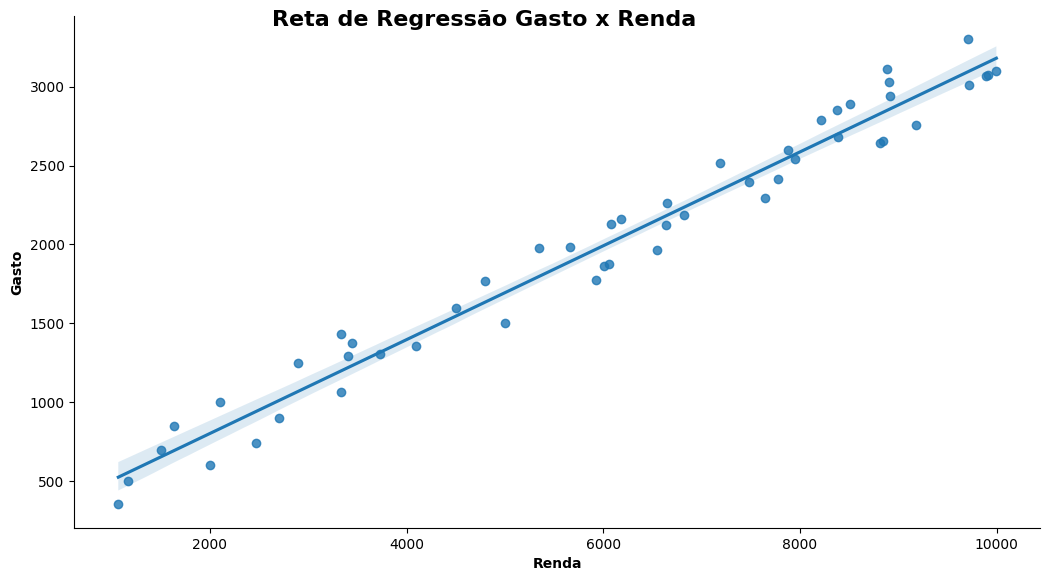

In [120]:
ax = sns.lmplot(x = 'renda', y = 'gasto', data = dataset)
ax.figure.set_size_inches(12,6)
ax.set_xlabels('Renda', fontweight = 'bold')
ax.set_ylabels('Gasto', fontweight = 'bold')
ax.fig.suptitle('Reta de Regressão Gasto x Renda', fontsize=16, fontweight='bold') #add title
plt.show()


### Análise da correlação

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

In [121]:
dataset.corr()

,gasto,renda
gasto,1.000000,0.984835
renda,0.984835,1.000000


### Modelo de regressão linear simples

https://www.statsmodels.org/stable/regression.html

In [122]:
import statsmodels.api as sm

In [123]:
Y = dataset.gasto
X = sm.add_constant(dataset.renda)

### Estimando o modelo

In [124]:
resultado_regressao = sm.OLS(Y,X).fit()

In [125]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  gasto   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           3.56e-38
Time:                        01:26:36   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Obtendo as previsões dentro da amostra

In [126]:
dataset['gasto_previsto'] = resultado_regressao.predict()

In [127]:
dataset

,gasto,renda,gasto_previsto
0,3011,9714,3095.785086
1,1305,3728,1316.203010
2,1879,6062,2010.079483
3,2654,8845,2837.439476
4,2849,8378,2698.604723
5,1068,3338,1200.259640
6,2892,8507,2736.955222
7,2543,7947,2570.472435
8,3074,9915,3155.540515
9,849,1632,693.081721


---

# <font color=green>3 CORRELAÇÃO</font>
***

## <font color=green>3.1 Covariância</font>
***

A covariância, ou variância conjunta, é a medida do grau de interdependência (ou inter-relação) numérica entre duas variáveis. É definida da seguinte maneira:

### Covariância populacional

# $$\sigma_{xy} = \frac 1n\sum_{i=1}^{n}(X_i-\mu_x)(Y_i-\mu_y)$$

### Covariância amostral

# $$S_{xy} = \frac 1{n-1}\sum_{i=1}^{n}(X_i-\bar{X})(Y_i-\bar{Y})$$

### Gerando uma amostra aleatória para facilitar o entendimento

In [128]:
amostra = dados.query('Renda < 5000').sample(n = 20, random_state = 101)

### Obtendo a matriz de covariância

In [129]:
amostra[['Idade', 'Renda', 'Anos de Estudo', 'Altura']].cov()

,Idade,Renda,Anos de Estudo,Altura
Idade,134.410526,-4947.968421,-16.410526,0.016506
Renda,-4947.968421,764668.326316,2209.021053,-7.138236
Anos de Estudo,-16.410526,2209.021053,16.936842,0.111281
Altura,0.016506,-7.138236,0.111281,0.003354


### Identificando as variâncias na diagonal principal da matriz

In [130]:
amostra.Idade.var()

134.4105263157895

## <font color=green>3.2 Interpretação da Covariância</font>
***

Valor de $S_{xy}$ positivo indica uma associação linear positiva entre x e y, ou seja, à medida que o valor de x aumenta, o valor de y também aumenta. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes I e III.

Se o valor de $S_{xy}$ for negativo temos um indicativo de associação linear negativa entre x e y, ou seja, à medida que x aumenta, o valor de y diminui. Neste caso, podemos ver na figura abaixo que os pontos que têm a maior influência sobre $S_{xy}$ devem estar nos quadrantes II e IV.

Finalmente, se os pontos estiverem uniformemente distribuídos pelos quadrantes, o valor de $S_{xy}$ se aproximará de zero, indicando que não existe nenhuma associação linear entre x e y.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img026.png" width=50%>

### Verificando a existência de uma associação linear negativa

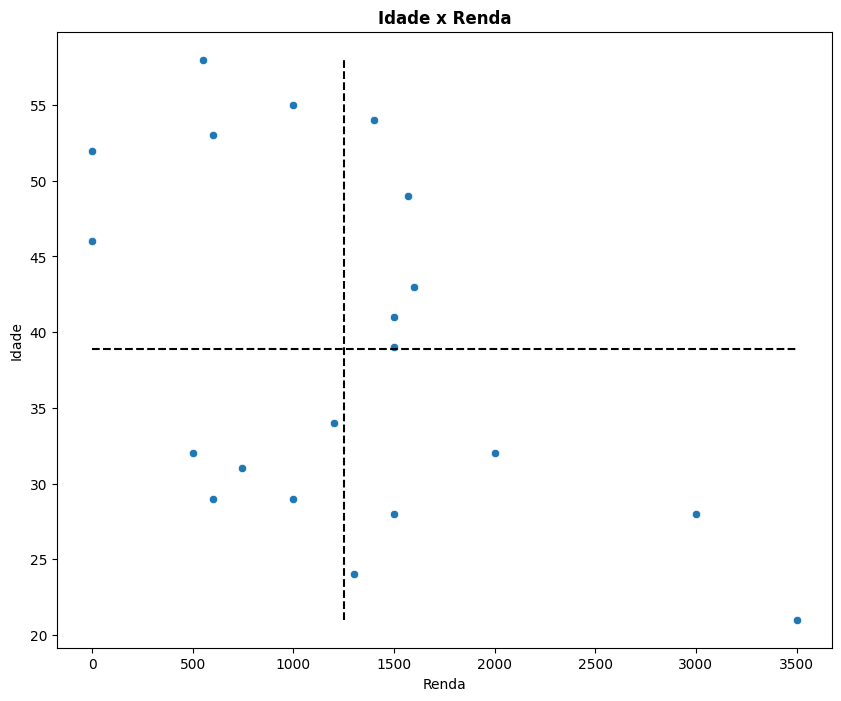

In [131]:
x = amostra.Renda
y = amostra.Idade

ax = sns.scatterplot (data = amostra, x = 'Renda', y = 'Idade')
ax.set_title('Idade x Renda', fontweight = 'bold')
ax.figure.set_size_inches(10,8)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), linestyles = 'dashed', color = 'black')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), linestyles = 'dashed', color = 'black')
plt.show()


### Verificando a existência de uma associação linear positiva

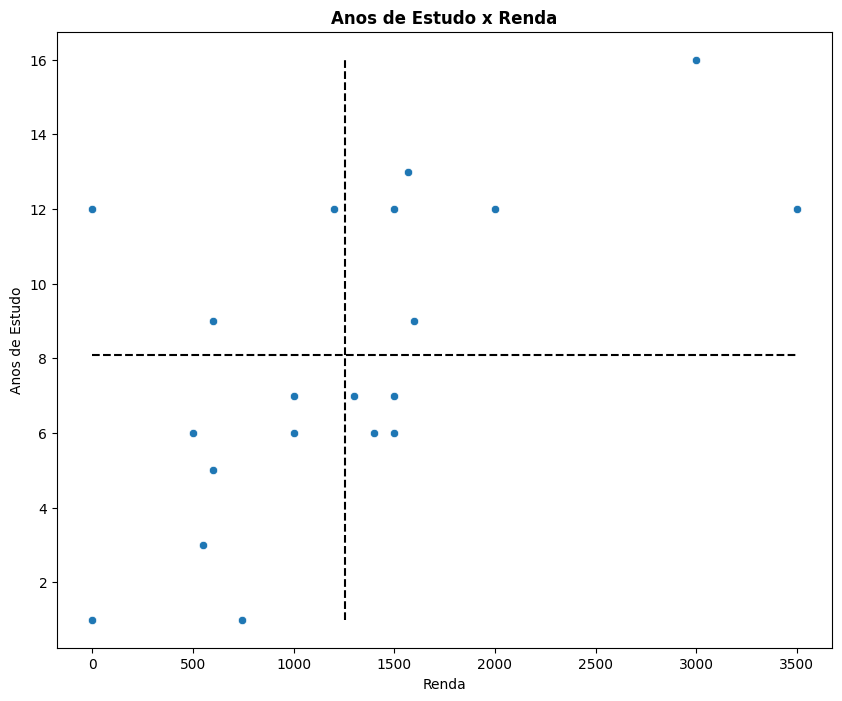

In [132]:
x = amostra.Renda
y = amostra['Anos de Estudo']

ax = sns.scatterplot (data = amostra, x = 'Renda', y = 'Anos de Estudo')
ax.set_title('Anos de Estudo x Renda', fontweight = 'bold')
ax.figure.set_size_inches(10,8)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), linestyles = 'dashed', color = 'black')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), linestyles = 'dashed', color = 'black')
plt.show()

### Verificando a inexistência de uma associação linear entre as variáveis

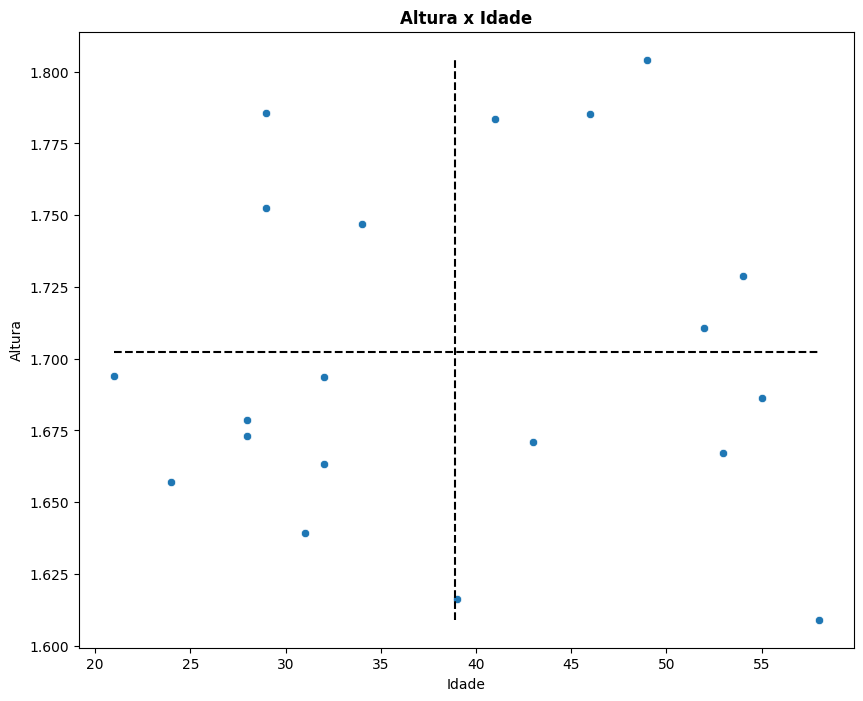

In [133]:
x = amostra.Idade
y = amostra.Altura

ax = sns.scatterplot (data = amostra, x = 'Idade', y = 'Altura')
ax.set_title('Altura x Idade', fontweight = 'bold')
ax.figure.set_size_inches(10,8)
ax.hlines(y = y.mean(), xmin = x.min(), xmax = x.max(), linestyles = 'dashed', color = 'black')
ax.vlines(x = x.mean(), ymin = y.min(), ymax = y.max(), linestyles = 'dashed', color = 'black')
plt.show()

### <font color='red'>Observação Importante:</font>
> Pelo que foi apresentado pode parecer que valores elevados, tanto positivos quanto negativos, para a covariância indicam relações lineares fortes entre as variáveis envolvidas. No entanto, um problema quando se usa a covariância como uma medida da intensidade da relação linear é que o valor da covariância depende das unidades de medida para x e y.
>
> Uma medida da relação entre duas variáveis que não é afetada pelas unidades de medida para x e y é o coeficiente de correlação que veremos no próximo tópico.

## <font color=green>3.3 Coeficiente de correlação de Pearson</font>
***

É obtido dividindo-se a covariância da população ou amostra pelo produto do desvio padrão populacional ou amostral de x pelo desvio padrão populacional ou amostral de y.

O coeficiente de correlação varia de -1 a +1. Valores que se aproximam de -1 ou +1 indicam uma relação linear forte. Quanto mais próxima a correlação estiver de zero, mais fraca será a relação.

Um ponto importante é que o coeficiente de correlação é uma medida de associação linear e não necessariamente de causação. Uma correlação alta entre duas variáveis não significa, necessariamente, que variações em uma delas provocará alterações na outra.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

### Obtendo $s_{xy}$

In [134]:
s_xy = dados[['Altura', 'Renda']].cov()
s_xy

,Altura,Renda
Altura,0.006355,-1.078964e+00
Renda,-1.078964,1.104491e+07


In [135]:
s_xy = s_xy.Altura.loc['Renda']
s_xy

np.float64(-1.0789639314252715)

### Obtendo $s_x$ e $s_y$

In [136]:
s_x = dados.Altura.std()
s_y = dados.Renda.std()

print('s_x: {}' .format(s_x))
print('s_y: {}' .format(s_y))

s_x: 0.07971743006825309
s_y: 3323.3877303470294


### Obtendo o coeficiente de correlação $r_{xy}$

In [137]:
r_xy = s_xy / (s_x * s_y)
print('Índice de correlação entre Renda e Altura: {}' .format(r_xy.round(6)))

Índice de correlação entre Renda e Altura: -0.004073


### Obtendo uma matriz de correlação com o Pandas

In [138]:
dados[['Altura', 'Renda']].corr()

,Altura,Renda
Altura,1.000000,-0.004073
Renda,-0.004073,1.000000


In [139]:
dataset[['gasto', 'renda']].corr()

,gasto,renda
gasto,1.000000,0.984835
renda,0.984835,1.000000


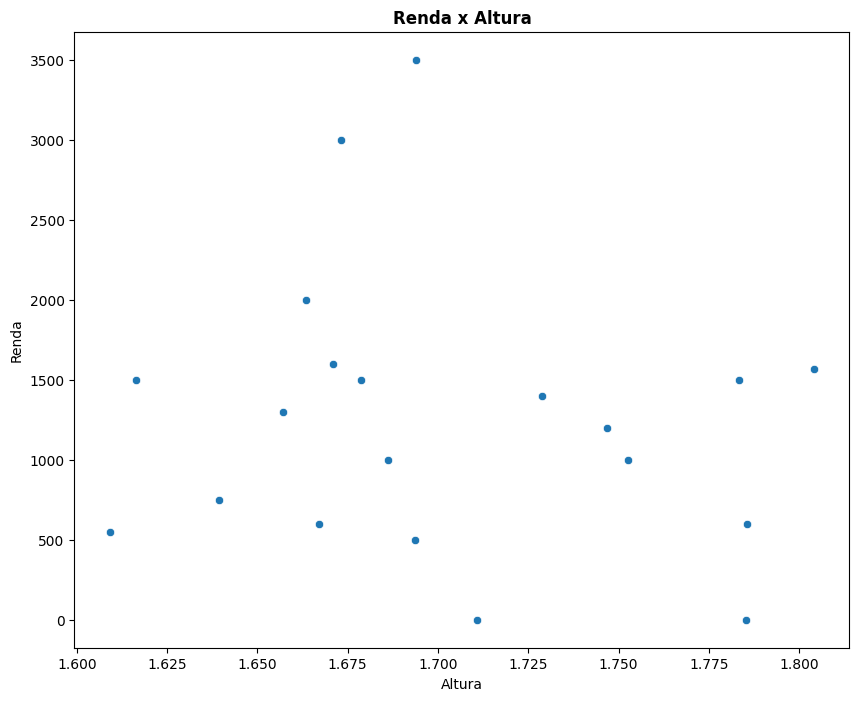

In [140]:
ax = sns.scatterplot (data = amostra, x = 'Altura', y = 'Renda')
ax.set_title('Renda x Altura', fontweight = 'bold')
ax.figure.set_size_inches(10,8)

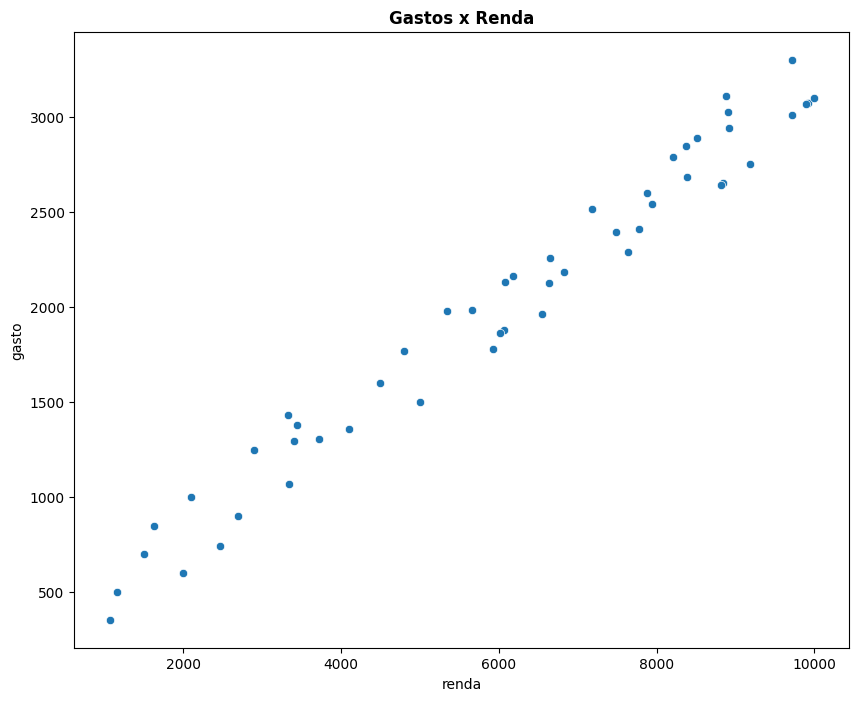

In [141]:
ax = sns.scatterplot (data = dataset, x = 'renda', y = 'gasto')
ax.set_title('Gastos x Renda', fontweight = 'bold')
ax.figure.set_size_inches(10,8)

---

# <font color=green>4 REGRESSÃO LINEAR</font>
***

A análise de regressão diz respeito ao estudo da dependência de uma variável (a variável dependente) em relação a uma ou mais variáveis, as variáveis explicativas ou independentes, visando estimar e/ou prever o valor médio da primeira em termos dos valores conhecidos ou fixados das segundas.

#### Terminologia

> A variável que é prevista é conhecida como variável dependente (*Y*).

> A variável utilizada para prever o valor da variável dependente é conhecida como variável independente (*X*).

Em nosso treinamento vamos abordar o tipo mais simples de análise de regressão que considera uma variável dependente e apenas uma variável independente onde a relação entre as variáveis se aproxima de uma linha reta.

## <font color=green>4.1 Regressão linear simples</font>
***

### Função consumo

Um economista famoso do passado concluiu em um de seus estudos que os indivíduos tendem a aumentar o seu consumo conforme sua renda aumenta. Logicamente esta teoria ganhou um pouco mais de complexidade, mas vamos utilizar sua forma mais simples para entender o procedimento de análise de regressão com a seguninte formulação:

# $$Y_i = \beta_1 + \beta_2X_i$$

Onde

- $Y_i$ é o gasto das famílias ou consumo das famílias

- $X_i$ é a renda disponível

- $\beta_1$ é conhecido como intercepto (no modelo teórico acima é conhecido como consumo autônomo, ou seja, o consumo quando o rendimento é zero)

- $\beta_2$ é o coefiente angular (no modelo teórico é a propensão marginal a consumir)

Em uma análise de regressão linear simples, o interesse está em estimar a função de regressão populacional como a apresentada acima, ou seja, estimar os valores dos parâmetros $\beta_1$ e $\beta_2$ com base nas observações de $Y$ e $X$.

### Carregando o dataset

In [142]:
dataset = {
    'gasto': [3011, 1305, 1879, 2654, 2849, 1068, 2892, 2543, 3074, 849, 2184, 2943, 1357, 2755, 2163, 3099, 1600, 353, 1778, 740, 2129, 3302, 2412, 2683, 2515, 2395, 2292, 1000, 600, 1864, 3027, 1978, 2791, 1982, 900, 1964, 1247, 3067, 700, 1500, 3110, 2644, 1378, 2601, 501, 1292, 2125, 1431, 2260, 1770],
    'renda': [9714, 3728, 6062, 8845, 8378, 3338, 8507, 7947, 9915, 1632, 6825, 8918, 4100, 9184, 6180, 9997, 4500, 1069, 5925, 2466, 6083, 9712, 7780, 8383, 7185, 7483, 7640, 2100, 2000, 6012, 8902, 5345, 8210, 5662, 2700, 6546, 2900, 9894, 1500, 5000, 8885, 8813, 3446, 7881, 1164, 3401, 6641, 3329, 6648, 4800]
}

In [143]:
dataset = pd.DataFrame(dataset)

### Identificando a relação entre as variáveis

https://seaborn.pydata.org/generated/seaborn.lmplot.html

Plota a reta de regressão entre duas variáveis juntamente com a dispersão entre elas.

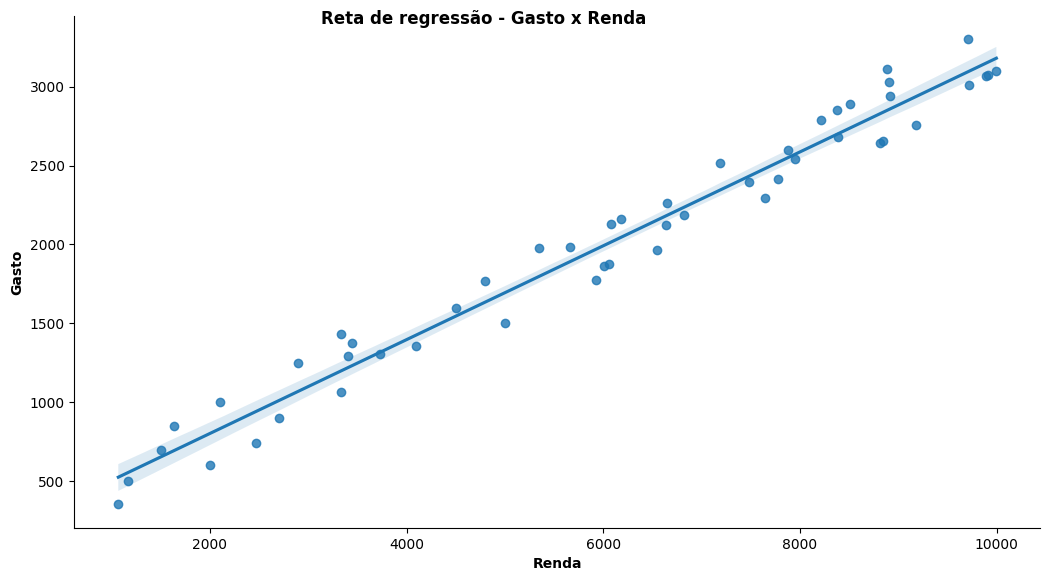

In [144]:
ax = sns.lmplot(x = 'renda', y = 'gasto', data = dataset)
ax.figure.set_size_inches(12,6)
ax.fig.suptitle('Reta de regressão - Gasto x Renda', fontweight = 'bold')
ax.set_xlabels('Renda', fontweight = 'bold')
ax.set_ylabels('Gasto', fontweight = 'bold')
plt.show()

### Matriz de correlação

In [145]:
dataset.corr()

,gasto,renda
gasto,1.000000,0.984835
renda,0.984835,1.000000


### Função de regressão populacional

A equação formulada acima é conhecida como **função de regressão populacional (FRP)** e em alguns livros é também representada da seguinte forma:

# $$E(Y|X_i) = \beta_1 + \beta_2X_i$$

Ela afirma que o valor esperado da distribuição de $Y$, dado $X_i$, tem uma relação funcional com $X_i$, isto é, a resposta média de $Y$ varia com $X$. O coeficientes $\beta_1$ e $\beta_2$ são conhecidos como coeficientes de regressão e também são conhecidos como intercepto e coeficiente angular, respectivamente.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

O gráfico de dispersão acima deixa claro que com o aumento da renda familiar, em média, as despesas de consumo das famílias aumentam, mas não no mesmo nível. O que podemos dizer é que para um nível de renda $X_i$ as despesas médias de consumo de uma
família agrupam-se em torno do consumo médio de todas as famílias deste nível $X_i$, isto é, em torno de sua esperança condicional $E(Y|X_i)$. Portanto, podemos expressar o desvio individual de $Y_i$ em torno de seu valor esperado da seguinte forma:

# $$u_i = Y_i - E(Y|X_i)$$

ou

# $$Y_i = E(Y|X_i) + u_i$$

onde o desvio $u_i$ é uma variável aleatória não-observável que assume valores positivos ou negativos. Esta variável é também cohecida como termo de erro estocástico.

Observe que a podemos representar a FRP em sua forma estocástica da seguinte maneira:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

## <font color=green>4.2 O método de mínimos quadrados</font>
***

Considere a seguinte **função de regressão da população (FRP)** para duas variáveis:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Como a **FRP** não pode ser obtida de forma direta, precisamos estimá-la através da **função de regressão amostral (FRA)**.

# $$Y_i = \hat{\beta}_1 + \hat{\beta}_2X_i + \hat{u}_i$$
# $$Y_i = \hat{Y}_i + \hat{u}_i$$

onde $\hat{Y}_i$ é o valor estimado de $Y_i$.

A partir da equação acima podemos expressar o erro da seguinte maneira:

# $$\hat{u}_i = Y_i - \hat{Y}_i$$
# $$\hat{u}_i = Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i$$

A ideia é determinar **FRA** de forma que fique o mais próximo possível do valor observado de $Y$. Intuitivamente uma forma interessante de fazer isso seria determinar **FRA** de maneira que a soma dos resíduos seja a menor possível.

# $$\sum\hat{u}_i = \sum{(Y_i - \hat{Y}_i)}$$

Avaliando a figura abaixo se pode verificar que talvez o critério de minimizar a soma dos resíduos não seja a melhor abordagem para solucionar o problema.

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img015.png" width=50%>

O critério de minimização da soma dos resíduos assume que todos os resíduos tem o mesmo peso no somatório, o que nem sempre se comprova. Em nosso exemplo os resíduos $\hat{u}_1$ e $\hat{u}_4$ encontram-se bem mais afastados da **FRA** que $\hat{u}_2$ e $\hat{u}_3$. Isso acarreta na possibilidade de que a soma dos $\hat{u}_i$'s seja bastante pequena e até mesmo nula, mesmo que os resíduos estejam muito dispersos em relação a reta de regressão.

Para evitar tal problema adotou-se o critério de minimização da soma dos quadrados dos resíduos que é conhecido como **Método de Mínimos Quadrados**.

# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{Y}_i)^2}$$
# $$\sum\hat{u}_i^2 = \sum{(Y_i - \hat{\beta}_1 - \hat{\beta}_2X_i)^2}$$

Após um procedimento de diferenciação, algumas simplificações e manipulações algébricas obtemos os **estimadores de mínimos quadrados**.

# $$
\begin{equation}
\boxed{\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}}
\end{equation}
$$

# $$
\begin{equation}
\boxed{
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
}
\end{equation}
$$

## <font color=green>4.3 Estimadores de mínimos quadrados ordinários</font>
***

### Obter $n$

In [146]:
n = len(dataset)
n

50

### Obter $\sum{Y}$

In [147]:
SOMA_Y = dataset.gasto.sum()
SOMA_Y

np.int64(100556)

### Obter $\sum{X}$

In [148]:
SOMA_X = dataset.renda.sum()
SOMA_X

np.int64(303275)

### Obter $\sum{X^2}$

In [149]:
SOMA_X_2 = dataset.renda.pow(2).sum()
SOMA_X_2

np.int64(2198628939)

### Obter $\sum{Y^2}$

In [150]:
SOMA_Y_2 = dataset.gasto.pow(2).sum()
SOMA_Y_2

np.int64(234954332)

### Obter $\sum{XY}$

In [151]:
dataset['XY'] = dataset.gasto * dataset.renda
SOMA_XY = dataset.XY.sum()
SOMA_XY

np.int64(716683794)

### Obter $\hat{\beta}_2$

# $$\hat{\beta}_2 = \frac{n\sum{X_iY_i} - \sum{X_i}\sum{Y_i}}{n\sum{X_i^2} - (\sum{X_i})^2}$$

In [152]:
B2 = ((n* SOMA_XY) - (SOMA_X* SOMA_Y)) / ((n * SOMA_X_2) - (SOMA_X**2))
B2

np.float64(0.29729069099372424)

### Obter $\hat{\beta}_1$

# $$
\begin{eqnarray}
\hat{\beta}_1 &=& \frac{\sum{X_i^2}\sum{Y_i} - \sum{X_i}\sum{X_iY_i}}{n\sum{X_i^2} - (\sum{X_i})^2}\\
&=& \bar{Y} - \hat{\beta}_2\bar{X}
\end{eqnarray}
$$

In [153]:
B1 = dataset.gasto.mean() - B2 * dataset.renda.mean()
B1

np.float64(207.90331377756547)

### Obtendo a estimativa dos parâmetros com o StatsModels

### Importando a biblioteca
https://www.statsmodels.org/stable/index.html

In [154]:
import statsmodels.api as sm

In [155]:
Y = dataset.gasto
X = sm.add_constant(dataset.renda)

### Estimando o modelo

In [156]:
resultado_regressao = sm.OLS(Y,X, missing = 'drop').fit()

### Visualizando os parâmetros estimados

In [157]:
B1

np.float64(207.90331377756547)

In [158]:
B2

np.float64(0.29729069099372424)

In [159]:
resultado_regressao.params

,0
const,207.903314
renda,0.297291


### Intervalo de confiança para os parâmetros estimados

In [160]:
resultado_regressao.conf_int(alpha = 0.05)

,0,1
const,107.116864,308.689763
renda,0.282092,0.312490


## <font color=green>4.4 Obtendo previsões</font>
***

# $$\hat{Y}_i = 207,9033 + 0,2973X_i$$

### Previsões dentro da amostra

In [161]:
dataset['Y_previsto_manual'] = B1 + B2 * dataset.renda

In [162]:
dataset.head(3)

,gasto,renda,XY,Y_previsto_manual
0,3011,9714,29248854,3095.785086
1,1305,3728,4865040,1316.203010
2,1879,6062,11390498,2010.079483


### Utilizando o statsmodels

In [163]:
dataset['Y_previsto'] = resultado_regressao.predict()

In [164]:
dataset.drop('Y_previsto_manual', axis = 1, inplace = True)

In [165]:
dataset.head(4)

,gasto,renda,XY,Y_previsto
0,3011,9714,29248854,3095.785086
1,1305,3728,4865040,1316.203010
2,1879,6062,11390498,2010.079483
3,2654,8845,23474630,2837.439476


### Estimando o 'Gasto das Famílias' fora da amostra

In [166]:
def prever_gasto(renda):
    return B1 + B2 * renda

In [167]:
prever_gasto(7510)

np.float64(2440.5564031404347)

### Estimando o 'Gasto das Famílias' fora da amostra via StatsModels

In [168]:
resultado_regressao.predict([1, 7510])

array([2440.55640314])

## <font color=green>4.5 Resíduos</font>
***

Como vimos anteriormente, o resíduo da i-ésima observação é a diferença entre o valor observado de nossa variável dependente ($Y_i$) e o valor estimado da variável dependente ($\hat{Y}_i$).

# $$\hat{u}_i = Y_i - \hat{Y}_i$$

Em outras palavras, $\hat{u}_i$ é o erro obtido ao se utilizar a equação de regressão estimada para prever o valor da variável dependente.

In [169]:
dataset['u'] = dataset.gasto - dataset.Y_previsto

In [170]:
dataset.head()

,gasto,renda,XY,Y_previsto,u
0,3011,9714,29248854,3095.785086,-84.785086
1,1305,3728,4865040,1316.203010,-11.203010
2,1879,6062,11390498,2010.079483,-131.079483
3,2654,8845,23474630,2837.439476,-183.439476
4,2849,8378,23868922,2698.604723,150.395277


In [171]:
dataset['Residuos'] = resultado_regressao.resid

In [172]:
dataset.head()

,gasto,renda,XY,Y_previsto,u,Residuos
0,3011,9714,29248854,3095.785086,-84.785086,-84.785086
1,1305,3728,4865040,1316.203010,-11.203010,-11.203010
2,1879,6062,11390498,2010.079483,-131.079483,-131.079483
3,2654,8845,23474630,2837.439476,-183.439476,-183.439476
4,2849,8378,23868922,2698.604723,150.395277,150.395277


In [173]:
dataset.drop('u', axis = 1, inplace = True)

In [174]:
dataset.drop('XY', axis = 1, inplace = True)

## <font color=green>4.6 Suposições sobre o termo de erro $u$</font>
***

### 1. O termo de erro $u$ é uma variável aleatória com média igual a zero: $E(u) = 0$
### 2. A variância de $u$ é a mesma para todos os valores de $X$
### 3. O valores de $u$ são independentes
### 4. O termo de erro $u$ é uma variável aleatória normalmente distribuída.

In [175]:
dataset.Residuos.mean()

np.float64(-5.525180313270539e-13)

In [176]:
dataset['Var_u'] = dataset.Residuos.var()
dataset.head()

,gasto,renda,Y_previsto,Residuos,Var_u
0,3011,9714,3095.785086,-84.785086,20101.755868
1,1305,3728,1316.203010,-11.203010,20101.755868
2,1879,6062,2010.079483,-131.079483,20101.755868
3,2654,8845,2837.439476,-183.439476,20101.755868
4,2849,8378,2698.604723,150.395277,20101.755868


### Plotando os resíduos do modelo

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

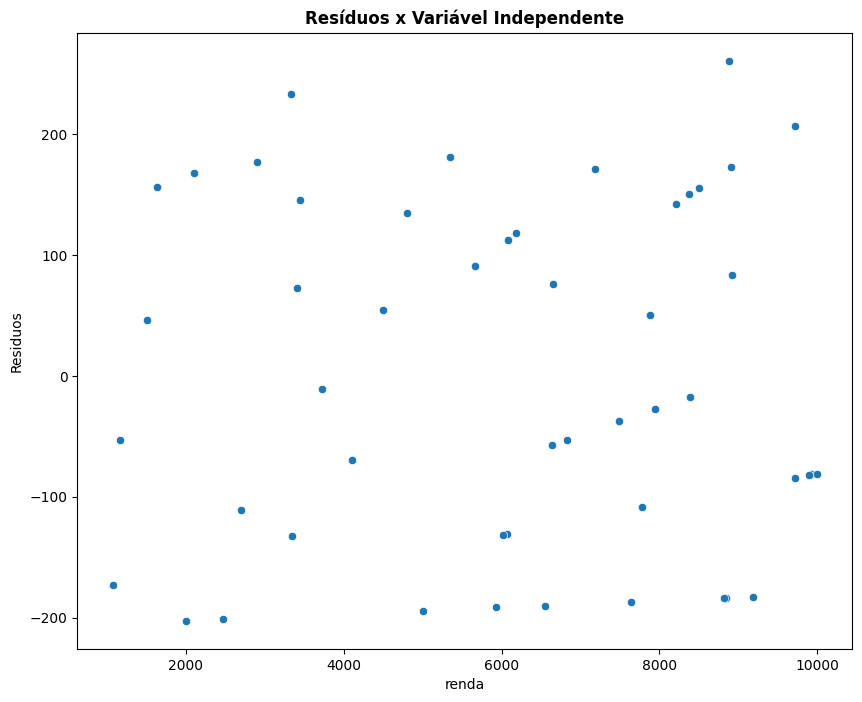

In [177]:
ax = sns.scatterplot (data = dataset, x = 'renda', y = 'Residuos')
ax.set_title('Resíduos x Variável Independente', fontweight = 'bold')
ax.figure.set_size_inches(10,8)

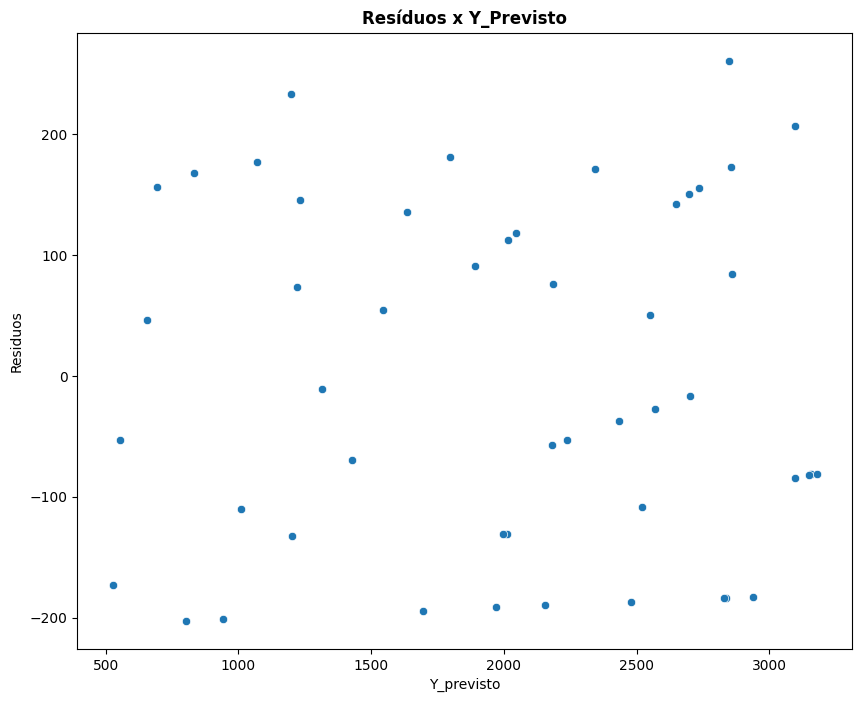

In [178]:
ax = sns.scatterplot(data = dataset, x = 'Y_previsto', y = 'Residuos')
ax.set_title('Resíduos x Y_Previsto', fontweight = 'bold')
ax.figure.set_size_inches(10,8)

### Hipótese de variância constante

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img028.jpg" width=80%>
Fonte: Econometria Básica - 5ª edição - Gujarati e Porter

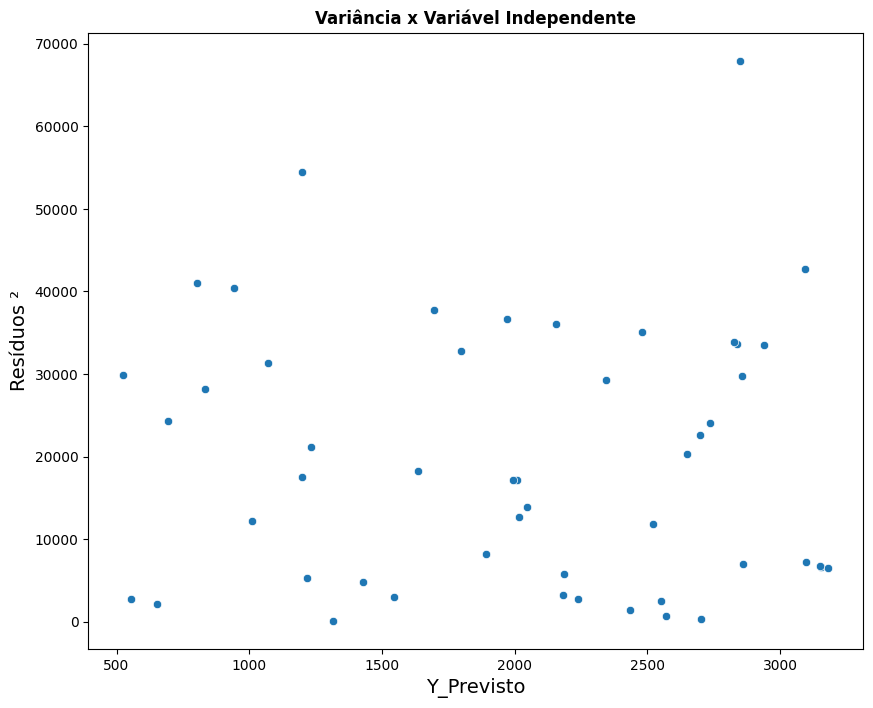

In [179]:
ax = sns.scatterplot (x = dataset['Y_previsto'], y = dataset.Residuos**2)
ax.set_title('Variância x Variável Independente', fontweight = 'bold')
ax.set_xlabel('Y_Previsto', fontsize = 14)
ax.set_ylabel('Resíduos ²', fontsize = 14)
ax.figure.set_size_inches(10,8)

## <font color=green>4.7 O coeficiente de determinação $R^2$</font>
***

O **coeficiente de determinação R²** é uma medida resumida que diz quanto a linha de regressão amostral se ajusta aos dados. Pode ser obtido a partir da seguinte fórmula:

# $$R^2 = \frac{\big[\sum{(Y_i - \bar{Y})(\hat{Y}_i - \bar{Y})}\big]^2}{\sum{(Y_i - \bar{Y}})^2 \sum{(\hat{Y}_i - \bar{Y}})^2}$$

Sabemos que o i-ésimo resíduo representa o erro de usarmos $\hat{Y}_i$ para estimar $Y_i$. A soma dos quadrados desses resíduos é o valor que é minimizado pelo método dos mínimos quadrados. Esse valor pode ser representado da seguinte forma:

# $$SQE = \sum{(Y_i - \hat{Y}_i)^2}$$

O valor da SQE é uma medida do erro de se usar a equação de regressão estimada para estimar os valores da variável dependente na amostra.

Outro componente que podemos medir é a soma dos quadrados total (SQT) que representa a medida do erro envolvido no uso da média ($\bar{Y}$) para fazer as estimativas. A SQT pode ser representada da forma abaixo:

# $$SQT = \sum{(Y_i - \bar{Y})^2}$$

Para quantificar o quanto os valores estimados ($\hat{Y}_i$) se afastam da média ($\bar{Y}$) podemos obter mais uma soma de quadrados. Essa soma é chamada de soma dos quadrados da regressão (SQR) e é representada pela seguinte fórmula:

# $$SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$$


### Soma do quadrados do erros (SQE)

In [180]:
dataset['Residuos^2'] = dataset.Residuos**2
SQE = dataset['Residuos^2'].sum()
SQE

np.float64(984986.0375191914)

In [181]:
resultado_regressao.ssr

np.float64(984986.0375191915)

### Soma do quadrados total (SQT)

In [182]:
SQT = (dataset.gasto - dataset.gasto.mean())**2
SQT = SQT.sum()
SQT

np.float64(32724149.279999997)

### Soma do quadrados da regressão (SQR)

In [183]:
SQR = (dataset.Y_previsto - dataset.gasto.mean())**2
SQR = SQR.sum()
SQR

np.float64(31739163.24248083)

In [184]:
resultado_regressao.ess

np.float64(31739163.242480807)

### Relação entre as somas de quadrados

# $$SQT = SQR + SQE$$

Onde,


### $SQE = \sum{(Y_i - \hat{Y}_i)^2}$

### $SQT = \sum{(Y_i - \bar{Y})^2}$

### $SQR = \sum{(\hat{Y}_i - \bar{Y})^2}$


<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img029.png" width=50%>

In [185]:
SQR + SQE

np.float64(32724149.28000002)

In [186]:
SQT

np.float64(32724149.279999997)

### Coeficiente de determinação (R²)

A regressão estimada teria um ajuste perfeito se todos os valores da variável dependente ($Y_i$) estiverem sobre a reta de regressão estimada. Quando isso ocorre temos $Y_i - \hat{Y}_i = 0$ para todas as observações, o que resulta em uma $SQE = 0$. Como $SQT=SQR+SQE$, é possível deduzir que para termos um ajuste perfeito $SQT$ deve ser igual a $SQR$ e a razão entre estas medidas ($\frac{SQR}{SQT}$) deve ser igual a 1.

Quando o ajuste não é tão perfeito nota-se que a $SQE$ apresenta valores maiores o que faz a razão $\frac{SQR}{SQT}$ diminuir, e em uma situação de total imperfeição do ajuste teríamos uma $SQR=0$ e $SQE=SQT$ levando a $\frac{SQR}{SQT}=0$.

A razão $\frac{SQR}{SQT}$, que assume valores entre 0 e 1, é utilizada como medida de eficiência do ajuste da equação de regressão estimada. Essa medida é conhecida como coeficiente de determinação (R²).

# $$R^2 = \frac{SQR}{SQT}$$

## <font color='red'>Observação</font>
> Somente com a utilização do R² não é possível tirar conclusões sobre a relação entre $Y$ e $X$ ser ou não ser estatisticamente
significativa. Este tipo de afirmação deve basear-se em considerações que envolvem o tamanho da amostra e as propriedades da distribuição amostral dos estimadores mínimos quadrados.

In [187]:
R2 = SQR / SQT
R2

np.float64(0.9699003317369304)

In [188]:
resultado_regressao.rsquared

np.float64(0.9699003317369297)

## <font color=green>4.8 Testes aplicados a modelos de regressão</font>
***

Como vimos, em uma regressão linear simples, a média da variável dependente ($Y$) é uma função linear da variável independente ($X$):

# $$Y_i = \beta_1 + \beta_2X_i$$

Se o valor de $\beta_2$ for zero podemos verificar que o valor médio de $Y$ não depende do valor de $X$ e, portanto, concluímos que $X$ e $Y$ não estão linearmente relacionados. De forma alternativa, se o valor de $\beta_2$ não for igual a zero, concluímos que as duas variáveis estão relacionadas.

Para testar se a relação de regressão é significativa, é preciso realizar um **teste de hipóteses** para determinar se o valor de $\beta_2$ é zero. Antes de realizar este tipo de teste precisamos obter uma estimativa para $\sigma^2$ (variância do erro).

### Output do modelo de regressão estimado

In [189]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  gasto   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           3.56e-38
Time:                        01:26:39   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Erro quadrático médio - estimativa de $\sigma^2$

Lembre-se que a **soma dos quadrados do erros (SQE)** é uma medida numérica da variabilidade dos dados observados em torno da reta de regressão estimada. Todas as somas de quadrados, estudadas anteriormente, estão associadas a um determinado número de graus de liberdade. No caso da SQE, como devem ser estimados dois parâmetros, temos $n-2$ graus de liberdade.

O **erro quadrático médio**, representado pela equação abaixo, pode ser obtido dividindo-se a SQE por $n-2$ graus de liberdade.

# $$EQM = \frac{SQE}{n-2}$$

In [190]:
EQM = SQE / (n-2)
EQM

np.float64(20520.542448316486)

In [191]:
EQM = resultado_regressao.mse_resid
EQM

np.float64(20520.54244831649)

In [192]:
EQM**0.5

np.float64(143.24993001155877)

### Teste de hipótese para nulidade do coeficiente angular

Considere o seguinte modelo de regressão linear simples:

# $$Y_i = \beta_1 + \beta_2X_i + u_i$$

Se as variáveis $Y$ e $X$ são linearmente relacionadas, espera-se que $\beta_2$ seja diferente de zero. Para testar esta hipótese formulamos um teste de hipótese com a seguinte especificação de hipóteses nula e alternativa:

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

Caso $H_0$ seja rejeitada, concluiremos que existe uma relação linear estatisticamente significativa entre as duas variáveis.

Considere agora que $b_1$ e $b_2$ são nossos estimadores de mínimos quadrados. Considere que a distribuição amostral de $b_2$ segue uma normal e também as seguintes propriedades:

# $$E(b_2) = \beta_2$$
# $$\sigma_{b_2} = \frac{\sigma}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Como não conhecemos o valor de $\sigma$, utilizamos $s$ como estimativa:

# $$s_{b_2} = \frac{s}{\sqrt{\sum{(X_i - \bar{X})^2}}}$$

Note que o valor esperado de $b_2$ é $\beta_2$, logo, $b_2$ é um estimador não viesado de $\beta_2$. Abaixo temos a estatística de teste (t) que segue uma distribuição t de Student com $n-2$ graus de liberdade.

# $$t = \frac{b_2 - \beta_2}{s_{b_2}}$$

### Calculando $s$

In [193]:
s = EQM**0.5
s

np.float64(143.24993001155877)

### Calculando $\sum{(X_i - \bar{X})^2}$

In [194]:
SOMA_DESVIO2 = ((dataset.renda - dataset.renda.mean())**2).sum()
SOMA_DESVIO2

np.float64(359114426.5)

### Calculando $s_{b_2}$

In [195]:
s_beta_2 = s / SOMA_DESVIO2**0.5
s_beta_2

np.float64(0.00755923753376846)

### Determinando as áreas de aceitação e rejeição de $H_0$

In [196]:
from scipy.stats import t as t_student

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img031.png)

### Níveis de confiança e significância

In [197]:
significancia = 0.05

In [198]:
confianca = 1 - significancia

In [199]:
graus_de_liberdade = resultado_regressao.df_resid

### Obtendo $t_{\alpha/2}$

In [200]:
t_alpha_2 = t_student.ppf(confianca + (significancia/2), n-2)
t_alpha_2

np.float64(2.010634757624232)

![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img032.png)

### Obtendo $t = \frac{b_2 - \beta_2}{s_{b_2}}$

In [201]:
t = (B2 - 0) / s_beta_2
t

np.float64(39.32813192675502)

In [202]:
resultado_regressao.tvalues

,0
const,4.147558
renda,39.328132


![Região de Aceitação](https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img033.png)

### Etapas e regras de decisão do teste t de significância dos parâmetros

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img030.png" width=90%>

### <font color='red'>Critério do valor crítico</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se $t \leq -t_{\alpha / 2}$ ou se $t \geq t_{\alpha / 2}$

In [203]:
if (t <= -t_alpha_2) or (t >= t_alpha_2):
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


### <font color='red'>Critério do $p-valor$</font>

> ### Teste Bicaudal
> ### Rejeitar $H_0$ se o valor $p\leq\alpha$

In [204]:
p_value = 2* (t_student.sf(t, n-2))
p_value

np.float64(3.5555432285859883e-38)

In [205]:
p_value = resultado_regressao.pvalues[1]
p_value

<ipython-input-205-306e6461404a>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = resultado_regressao.pvalues[1]


np.float64(3.5555432285859883e-38)

In [206]:
if p_value <= significancia:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


### <font color='green'>Conclusão: Rejeitamos $H_0$ e concluímos que existe uma relação significativa entre as duas variáveis.</font>

In [207]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  gasto   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           3.56e-38
Time:                        01:26:39   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

---

### Teste F

O teste F também é uma ferramenta para testar a significância na regressão. Baseado na distribuição F de probabilidade, o teste F é utilizado para verificar a significância global na regressão, isto é, em uma regressão múltipla, onde existe mais de uma variável independente, o teste F verifica a nulidade de todos os parâmetros do modelo conjuntamente.

Em nosso caso (regressão linear simples) ele fornece a mesma conclusão obtida com o teste t.

**Hipóteses:**

## $H_0: \beta_2 = 0$
## $H_1: \beta_2 \neq 0$

**Estatística de teste:**

# $$F = \frac{\frac{SQR}{k}}{\frac{SQE}{n-k-1}}$$

Onde,

$SQR$ - soma dos quadrados da regressão

$SQE$ - soma dos quadrados dos erros

$k$ - total de variáveis independentes ($X$)

**Regras de rejeição de $H_0$:**

**Critério do valor crítico** $\rightarrow$ Rejeitar se $F \geq F_{\alpha}$

Onde,

$F_{\alpha}$ - baseia-se na distribuição F com $k$ graus de liberdade no numerador e $n-k-1$ no denominador.

**Critério do p-valor** $\rightarrow$ Rejeitar se $p-valor \leq \alpha$

### Calculando a estatística de teste ($F$)

In [208]:
resultado_regressao.mse_model

np.float64(31739163.242480807)

In [209]:
resultado_regressao.mse_resid

np.float64(20520.54244831649)

In [211]:
F = resultado_regressao.mse_model / resultado_regressao.mse_resid
F

np.float64(1546.7019608482472)

In [212]:
resultado_regressao.fvalue

np.float64(1546.7019608482472)

### Obtendo o p-valor

In [213]:
resultado_regressao.f_pvalue

np.float64(3.5555432285860227e-38)

In [214]:
from scipy.stats import f

In [215]:
p_value_f = f.sf(F, 1, 48)
p_value_f

np.float64(3.5555432285860227e-38)

# <font color=green>5 EXTRAS</font>
***

## <font color=green>5.1 Outros testes</font>
***

In [216]:
print(resultado_regressao.summary())

                            OLS Regression Results                            
Dep. Variable:                  gasto   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     1547.
Date:                Mon, 28 Apr 2025   Prob (F-statistic):           3.56e-38
Time:                        01:48:44   Log-Likelihood:                -318.16
No. Observations:                  50   AIC:                             640.3
Df Residuals:                      48   BIC:                             644.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        207.9033     50.127      4.148      0.0

### Normalidade dos resíduos - Omnibus

> ### $H_0:$ Os dados se distribuem como uma normal

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

In [217]:
from scipy.stats import normaltest

In [219]:
omnibus, p_value_omnibus = normaltest(dataset.Residuos)

In [220]:
if p_value_omnibus <= 0.05:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Rejeitar H0


https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.probplot.html

In [222]:
from scipy.stats import probplot
import matplotlib.pyplot as plt

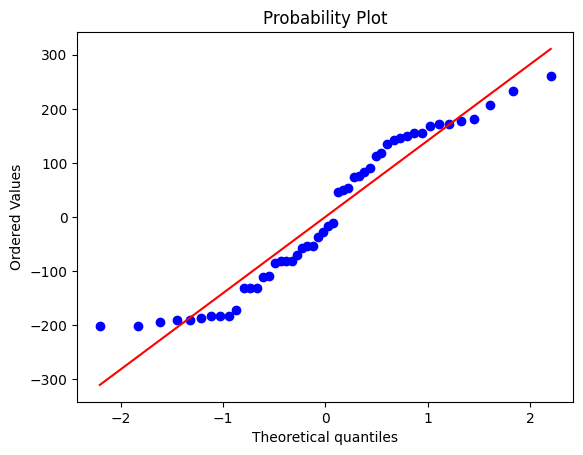

In [223]:
(_, (_, _, _)) = probplot(dataset.Residuos, plot = plt)

### Verificando a simetria

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skew.html

In [224]:
from scipy.stats import skew

In [225]:
S = skew(dataset.Residuos)
S

np.float64(0.07306920116444166)

### Verificando a curtose

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kurtosis.html

In [227]:
from scipy.stats import kurtosis
C = 3 + kurtosis(dataset.Residuos)
C

np.float64(1.6369621580686435)

### Normalidade dos resíduos - Jarque-Bera (statsmodels)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

In [230]:
JB = (n / 6) * ((S**2) + (1/4) * ((C - 3)**2))
JB

np.float64(3.915059564941934)

In [231]:
from scipy.stats import chi2

In [232]:
p_valor_jb = chi2.sf(JB, 2)
p_valor_jb

np.float64(0.14120680197285554)

In [233]:
if p_valor_jb <= 0.05:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Aceitar H0


### Normalidade dos resíduos - Jarque-Bera (Correção)

> ### $H_0:$ Os dados se distribuem como uma normal

> ### Estatística de teste
> ### $$JB = \frac{n-k}{6}(S^2 + \frac{1}{4}(C - 3)^2)$$
> #### Onde,
> #### $n$ - número de observações
> #### $k$ - número de parâmetros do modelo
> #### $S$ - Coeficiente de assimetria
> #### $C$ - Coeficiente de curtose

In [251]:
JB_corrigido = ((n-1) / 6) * ((S**2) + (1/4) * (C - 3)**2)
JB_corrigido

np.float64(3.836758373643095)

In [249]:
p_valor_jb_corrigido = chi2.sf(JB_corrigido, 2)
p_valor_jb_corrigido

np.float64(0.15270786052420476)

In [245]:
if p_valor_jb <= 0.05:
    print('Rejeitar H0')
else:
    print('Aceitar H0')

Aceitar H0


# Análise do Modelo de Regressão Linear Simples

## 1. **R² (R-quadrado) e R² ajustado**
- **R² = 0.970**: Isso significa que **97%** da variação no gasto mensal da família pode ser explicada pelo modelo de regressão linear usando o rendimento mensal da família. Esse é um valor muito alto e sugere que o modelo se ajusta bem aos dados.
- **R² ajustado = 0.969**: O R² ajustado é uma versão do R² que penaliza o modelo pela inclusão de variáveis adicionais. Como o modelo tem apenas uma variável explicativa (renda), o R² ajustado está muito próximo do R², o que indica que a inclusão de "renda" como variável explicativa é bem justificada.

## 2. **Coeficiente da variável explicativa ('renda')**
- **Coeficiente de 'renda' = 0.2973**: Esse coeficiente indica que, para cada aumento de **1 unidade** no rendimento mensal da família, o gasto mensal da família aumenta, em média, **0.2973 unidades**. A relação entre as duas variáveis parece ser **positiva** e relativamente forte, visto que o coeficiente é significativo.
- **P-valor para 'renda'**: **P>|t| = 0.000**: O p-valor associado ao coeficiente da 'renda' é muito baixo (menor que 0.05), o que sugere que a variável 'renda' é **estatisticamente significativa** para prever o gasto mensal da família. Isso indica que existe uma relação estatisticamente significativa entre a renda e o gasto.

## 3. **Significância do modelo**
- **F-statistic = 1547**: O valor alto do **F-statistic** sugere que o modelo de regressão como um todo é significativo. Esse valor está associado ao **p-valor** da estatística F, que é extremamente pequeno (**Prob (F-statistic) = 3.56e-38**), o que indica que pelo menos uma das variáveis explicativas no modelo tem uma relação estatisticamente significativa com a variável dependente (gasto).

## 4. **Erros padrão e valores t**
- **Erro padrão de 'renda' = 0.008**: O erro padrão de 0.008 indica que a estimativa do coeficiente de 'renda' tem uma precisão bastante alta.
- **Valor t para 'renda' = 39.328**: O valor t extremamente alto indica que o coeficiente de 'renda' é muito diferente de zero. Isso confirma que a variável 'renda' tem um impacto substancial sobre o gasto.

## 5. **Teste de normalidade dos resíduos**
- **Omnibus = 22.833 e Prob(Omnibus) = 0.000**: O teste **Omnibus** tem um valor alto e um p-valor muito pequeno, indicando que **os resíduos não seguem uma distribuição normal**. Isso é uma violação da suposição de normalidade dos erros, que é uma suposição importante na regressão linear.
  - **Skew = 0.073 e Kurtosis = 1.637**: A assimetria (skew) está bem próxima de zero, o que sugere que os resíduos não são muito inclinados para um dos lados. Porém, a **kurtosis** está abaixo de 3 (valor esperado para uma distribuição normal), indicando que os resíduos têm **caudas mais leves** do que a distribuição normal.
  - **Jarque-Bera (JB) = 3.915 e Prob(JB) = 0.141**: O **teste de Jarque-Bera** também sugere que os resíduos não seguem exatamente uma distribuição normal, mas como o p-valor é 0.141 (acima de 0.05), a evidência não é forte o suficiente para rejeitar a normalidade dos resíduos. Portanto, embora a normalidade dos resíduos seja questionada, não há uma forte evidência estatística de que isso prejudique o modelo.

## 6. **Durbin-Watson (DW) = 2.408**
- O **Durbin-Watson** verifica a presença de **autocorrelação dos resíduos**. O valor de **2.408** sugere que não há **autocorrelação significativa** entre os resíduos, o que é uma boa notícia, já que a autocorrelação dos resíduos pode violar a suposição de independência dos erros.

## 7. **Conclusões sobre a confiabilidade do modelo**
### Vantagens:
- O modelo apresenta **alto poder explicativo**, com um **R² muito alto** (0.970), o que indica uma boa capacidade de previsão do gasto com base no rendimento.
- O **coeficiente da variável 'renda'** é **estatisticamente significativo**, e o erro padrão é baixo, o que significa que o modelo está fazendo boas estimativas.
- O modelo não apresenta **autocorrelação** dos erros, o que é desejável.

### Desvantagens e limitações:
1. **Normalidade dos resíduos**:
   - O **teste Omnibus** indica que os resíduos não seguem uma distribuição normal (p-valor muito baixo), o que viola uma suposição importante na regressão linear. A **normalidade dos resíduos** é crucial para a precisão de testes de hipóteses e intervalos de confiança.
   - A presença de **caudas mais leves** nos resíduos (de acordo com a **kurtosis**) também pode afetar a confiança nas estimativas.
   
2. **Dependência de uma única variável**:
   - O modelo usa **somente a variável `renda`** para prever o `gasto`. Isso limita sua capacidade de capturar a complexidade de possíveis fatores que podem influenciar o `gasto` e que não foram incluídos no modelo.
   - **Outras variáveis** (como número de membros da família, condições de saúde, localização geográfica, entre outras) podem ter influência significativa no gasto mensal e não são consideradas no modelo.

3. **Autocorrelação**:
   - O **Durbin-Watson** de 2.408 sugere que não há **autocorrelação** significativa dos resíduos, o que é bom. Isso implica que os erros são **independentes**, como esperado, e o modelo está bem especificado nesse sentido.

4. **Possíveis não linearidades**:
   - A relação entre `renda` e `gasto` pode não ser estritamente **linear** em todas as situações. Embora o modelo linear tenha mostrado um bom ajuste, se houver curvaturas ou interações entre variáveis não consideradas, isso pode limitar o poder preditivo do modelo.

5. **Sobreajuste (Overfitting)**:
   - Como o modelo tem um **R² muito alto** com apenas uma variável explicativa, pode haver o risco de **sobreajuste** em dados específicos. Ou seja, o modelo pode estar muito bem ajustado aos dados de treino, mas pode ter um desempenho inferior em novos dados não vistos.

## 8. **Possíveis melhorias**
- **Transformação de variáveis**: Caso os resíduos não sigam uma distribuição normal de forma grave, pode-se tentar **transformar os dados** (ex.: logaritmo) para melhorar a normalidade dos resíduos.
- **Modelos mais complexos**: Se o modelo linear simples não for adequado devido a possíveis não-linearidades ou outras variáveis não capturadas, seria interessante explorar modelos de **regressão múltipla**, **polinomial** ou **não paramétricos**.

#### Conclusão:

Embora o modelo tenha mostrado um **bom ajuste aos dados de treino** (com alto R² e um coeficiente significativo), não podemos afirmar com certeza que ele faz **boas previsões** sem validar seu desempenho em dados fora da amostra usada para estimar o modelo. Algumas limitações (como a violação da normalidade dos resíduos e o uso de uma única variável explicativa) indicam que, embora o modelo seja útil, ele pode ser **sensível a outras variáveis e não-linearidades** que não foram consideradas.

Para avaliar a **capacidade preditiva real** do modelo, seria necessário realizar:
- **Validação cruzada** para testar o modelo em diferentes subconjuntos de dados e avaliar sua robustez.
- Análise do **erro de previsão** em novos dados (por exemplo, através de um conjunto de teste ou dados de validação).
- A análise dos **resíduos** para garantir que o modelo seja apropriado para os dados em questão e que não existam padrões não capturados.

Portanto, embora o modelo seja promissor, ele **não pode ser considerado definitivo** sem mais testes e validações em dados novos.